In [4]:
import pandas as pd
import s3fs

In [5]:
fs = s3fs.S3FileSystem(client_kwargs={"endpoint_url": "https://minio.lab.sspcloud.fr"})
MY_BUCKET = "williamolivier"

FILE_PATH_S3_FVDEP = f"{MY_BUCKET}/diffusion/epci_6_clusters.csv"
with fs.open(FILE_PATH_S3_FVDEP, "rb") as file:
    epci_features = pd.read_csv(file)


In [6]:
epci_features.sample()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,SIREN_EPCI,NOM,INSEE_COM,INSEE_DEP,POPULATION,Nb actifs à temps partiel,Nb ménages en 2021,...,distance_entrant_50<x<infkm_rouge,nb_sortant_50<x<infkm_rouge,distance_sortant_50<x<infkm_rouge,nb_intra_rouge,distance_intra_rouge,total_entrants,total_sortants,sortant_sur_entrant,cluster,color
621,621,639,639,200071520,"['Saint-Christophe-de-Chaulieu', 'Avrilly', 'M...","['61374', '61021', '61281', '61262', '61369', ...","['61', '61', '61', '61', '61', '61', '61', '61...",15836.0,955.849343,7341.86132,...,36726.637387,137.791946,15370.768431,1963.465158,15932.422096,3060.654948,2242.583018,0.732713,3,"(np.float64(0.12156862745098039), np.float64(0..."


étape 1 : Il faut choisir un clustering parmi les 4 (on demandera l'avis de Nicolas) et pour chaque cluster trouver une composition moyenne des transports en communs utilisé (ex 80% metro et 10% train et 10% bus pour le cluster ou y'a que paris, etc)

étape 2 : Il faut écrire un dictionnaire qui recense pour chaque type de transport en commun son émission moy/km 

étape 3 : Créer une nouvelle colonne sur un des 4 tableaux (selon le clustering retenu) qui donnerait une émission moyenne pour chaque EPCI (soit global, soit par type de flux (séparer rouge et jaune? à voir))

-> pour cette étape voir si + pertinent de prendre les flux entrant ou sortant ? ou une moyenne des 2 ?

étape 4 : trouver un moyen de repérer les mauvais élèves (par exemple ceux dont l'émission associée calculée est aberrante ou plus élevée par rapport aux autres EPCI du même cluster)

-> pour cette étape trouver un indicateurs pour détecter les mauvais élève (ex arbitraire 50% aus dessus de la moyenne) mais voir si on peut trouver un meilleur indicateur bien justifier

In [ ]:
'''
# Etape 1

# Pour l'instant choix du clustering à 7 clusters
# On prend en compte à la fois les flux entrants et les flux sortants pour faire les calculs

epci_features=epci_features_7 # il suffira de changer le numéro du clustering choisi ici

epci_features["nombre_total_de_flux_par_epci"]=(
    epci_features["nb_entrant_>50km_rouge"]
    +epci_features["nb_entrant_<50km_rouge"]
    +epci_features["nb_sortant_>50km_rouge"]
    +epci_features["nb_sortant_<50km_rouge"]
    +epci_features["nb_intra_rouge"]
    +epci_features["nb_entrant_>50km_vert"]
    +epci_features["nb_entrant_<50km_vert"]
    +epci_features["nb_sortant_>50km_vert"]
    +epci_features["nb_sortant_<50km_vert"]
    +epci_features["nb_intra_vert"]
    +epci_features["nb_entrant_>50km_jaune"]
    +epci_features["nb_entrant_<50km_jaune"]
    +epci_features["nb_sortant_>50km_jaune"]
    +epci_features["nb_sortant_<50km_jaune"]
    +epci_features["nb_intra_jaune"]
    )

# Calcul de la proportion d'individus qui se rendent au travail en voiture
epci_features["proportion_individus_flux_rouges"] = (
    (epci_features["nb_entrant_>50km_rouge"]
    + epci_features["nb_entrant_<50km_rouge"]
    + epci_features["nb_sortant_>50km_rouge"]
    + epci_features["nb_sortant_<50km_rouge"]
    + epci_features["nb_intra_rouge"])
    /epci_features["nombre_total_de_flux_par_epci"]
    )

# Calcul de la proportion d'individus qui se rendent au travail en transports en commun
epci_features["proportion_individus_flux_jaunes"] = (
    (epci_features["nb_entrant_>50km_jaune"]
    + epci_features["nb_entrant_<50km_jaune"]
    + epci_features["nb_sortant_>50km_jaune"]
    + epci_features["nb_sortant_<50km_jaune"]
    + epci_features["nb_intra_jaune"])
    /epci_features["nombre_total_de_flux_par_epci"]
    )

# Calcul de la proportion d'individus qui se rendent au travail à pieds / en vélo / qui télétravaillent ou travaillent à domicile
epci_features["proportion_individus_flux_verts"] = (
    (epci_features["nb_entrant_>50km_vert"]
    + epci_features["nb_entrant_<50km_vert"]
    + epci_features["nb_sortant_>50km_vert"]
    + epci_features["nb_sortant_<50km_vert"]
    + epci_features["nb_intra_vert"])
    /epci_features["nombre_total_de_flux_par_epci"]
    )

print(epci_features["proportion_individus_flux_rouges"].head())
print(epci_features["proportion_individus_flux_jaunes"].head())
print(epci_features["proportion_individus_flux_verts"].head())
print(epci_features["proportion_individus_flux_rouges"].head()
    +epci_features["proportion_individus_flux_jaunes"].head()
    +epci_features["proportion_individus_flux_verts"].head())
# les résultats sont parfaitement logiques ici
'''

0    0.744451
1    0.813836
2    0.719263
3    0.825774
4    0.772347
Name: proportion_individus_flux_rouges, dtype: float64
0    0.014824
1    0.042950
2    0.110643
3    0.025620
4    0.039409
Name: proportion_individus_flux_jaunes, dtype: float64
0    0.240725
1    0.143214
2    0.170094
3    0.148606
4    0.188245
Name: proportion_individus_flux_verts, dtype: float64
0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
dtype: float64


In [ ]:
'''
# Même chose avec la distance

epci_features["distance_totale_de_flux_par_epci"]=(
    epci_features["distance_entrant_>50km_rouge"]*epci_features["nb_entrant_>50km_rouge"]
    + epci_features["distance_entrant_<50km_rouge"]*epci_features["nb_entrant_<50km_rouge"]
    + epci_features["distance_sortant_>50km_rouge"]*epci_features["nb_sortant_>50km_rouge"]
    + epci_features["distance_sortant_<50km_rouge"]*epci_features["nb_sortant_<50km_rouge"]
    + epci_features["distance_intra_rouge"]*epci_features["nb_intra_rouge"]
    + epci_features["distance_entrant_>50km_vert"]*epci_features["nb_entrant_>50km_vert"]
    + epci_features["distance_entrant_<50km_vert"]*epci_features["nb_entrant_<50km_vert"]
    + epci_features["distance_sortant_>50km_vert"]*epci_features["nb_sortant_>50km_vert"]
    + epci_features["distance_sortant_<50km_vert"]*epci_features["nb_sortant_<50km_vert"]
    + epci_features["distance_intra_vert"]*epci_features["nb_intra_vert"]
    + epci_features["distance_entrant_>50km_jaune"]*epci_features["nb_entrant_>50km_jaune"]
    + epci_features["distance_entrant_<50km_jaune"]*epci_features["nb_entrant_<50km_jaune"]
    + epci_features["distance_sortant_>50km_jaune"]*epci_features["nb_sortant_>50km_jaune"]
    + epci_features["distance_sortant_<50km_jaune"]*epci_features["nb_sortant_<50km_jaune"]
    + epci_features["distance_intra_jaune"]*epci_features["nb_intra_jaune"]
    )

# Calcul de la proportion de kilomètres qui sont parcourus en voiture
epci_features["proportion_distance_flux_rouges"] = (
    (epci_features["distance_entrant_>50km_rouge"]*epci_features["nb_entrant_>50km_rouge"]
    + epci_features["distance_entrant_<50km_rouge"]*epci_features["nb_entrant_<50km_rouge"]
    + epci_features["distance_sortant_>50km_rouge"]*epci_features["nb_sortant_>50km_rouge"]
    + epci_features["distance_sortant_<50km_rouge"]*epci_features["nb_sortant_<50km_rouge"]
    + epci_features["distance_intra_rouge"]*epci_features["nb_intra_rouge"])
    /epci_features["distance_totale_de_flux_par_epci"]
    )

# Calcul de la proportion de kilomètres qui sont parcourus en transports en commun
epci_features["proportion_distance_flux_jaunes"] = (
    (epci_features["distance_entrant_>50km_jaune"]*epci_features["nb_entrant_>50km_jaune"]
    + epci_features["distance_entrant_<50km_jaune"]*epci_features["nb_entrant_<50km_jaune"]
    + epci_features["distance_sortant_>50km_jaune"]*epci_features["nb_sortant_>50km_jaune"]
    + epci_features["distance_sortant_<50km_jaune"]*epci_features["nb_sortant_<50km_jaune"]
    + epci_features["distance_intra_jaune"]*epci_features["nb_intra_jaune"])
    /epci_features["distance_totale_de_flux_par_epci"]
    )

# Calcul de la proportion de kilomètres qui sont parcourus à pieds / en vélo / qui télétravaillent ou travaillent à domicile
epci_features["proportion_distance_flux_verts"] = (
    (epci_features["distance_entrant_>50km_vert"]*epci_features["nb_entrant_>50km_vert"]
    + epci_features["distance_entrant_<50km_vert"]*epci_features["nb_entrant_<50km_vert"]
    + epci_features["distance_sortant_>50km_vert"]*epci_features["nb_sortant_>50km_vert"]
    + epci_features["distance_sortant_<50km_vert"]*epci_features["nb_sortant_<50km_vert"]
    + epci_features["distance_intra_vert"]*epci_features["nb_intra_vert"])
    /epci_features["distance_totale_de_flux_par_epci"]
    )

print(epci_features["proportion_distance_flux_rouges"].head())
print(epci_features["proportion_distance_flux_rouges"].mean())
print(epci_features["proportion_distance_flux_jaunes"].head())
print(epci_features["proportion_distance_flux_jaunes"].mean())
print(epci_features["proportion_distance_flux_verts"].head())
print(epci_features["proportion_distance_flux_verts"].mean())
print((epci_features["proportion_distance_flux_rouges"]+epci_features["proportion_distance_flux_jaunes"]+epci_features["proportion_distance_flux_verts"]).head())
# La somme de toutes les proportions fait 1
# Les résultats sont logiques
'''

0    0.718892
1    0.798117
2    0.624328
3    0.839840
4    0.817619
Name: proportion_distance_flux_rouges, dtype: float64
0.7824275620054975
0    0.128145
1    0.122134
2    0.305475
3    0.105396
4    0.105409
Name: proportion_distance_flux_jaunes, dtype: float64
0.12784286167720002
0    0.152964
1    0.079749
2    0.070197
3    0.054764
4    0.076972
Name: proportion_distance_flux_verts, dtype: float64
0.0897295763173026
0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
dtype: float64


In [7]:
# Etape 2

# SOURCE : https://www.data.gouv.fr/fr/datasets/emission-de-co2e-par-voyageur-kilometre-sur-le-reseau/

pollution_au_km={
    "voiture":"0.097", 
    "bus":"0.092", 
    "metro":"0.0038",
    "tram":"0.0032",
    "transilien":"0.0066",
    "TER":"0.02693"
}

In [ ]:
# CALCUL EMISSIONS TOTALES 

pollution_au_km_flux_jaunes ={
    "Bus": 0.092, 
    "Métro/tram/transilien": 0.0045,
    "TER": 0.02693
}

pollution_au_km_flux_rouges = 0.097

# Dictionnaire avec les valeurs choisies pour chaque mode de TC en % de la distance parcourue en TC 

flux_jaunes_detail = {
    0 : { #Villes moyennes
        "Métro/tram/transilien": 0.2,
        "TER": 0.4,   
        "Bus": 0.4   
    },
    1 : { #Banlieue Paris
        "Métro/tram/transilien": 0.7,  
        "TER": 0.1,    
        "Bus": 0.2    
    },
    2 : { #Paris
        "Métro/tram/transilien": 0.8,  
        "TER": 0.1,   
        "Bus": 0.1   
    },
    3 : { #Autres
        "Métro/tram/transilien": 0, 
        "TER": 0.5,    
        "Bus": 0.5     
    },
    4 : { #Grandes villes
        "Métro/tram/transilien" : 0.5,
        "TER" : 0.2,
        "Bus" : 0.3
    },
    5 : { # Banlieue proche Paris
        "Métro/tram/transilien" : 0.7,
        "TER" : 0.1,
        "Bus" : 0.2
    }
}


# ici flux intra + moyenne des flux sortants et entrants 
epci_features["moyenne_flux_rouges"] = (
    epci_features['distance_intra_rouge'] +(
    epci_features['distance_entrant_<10km_rouge'] + 
    epci_features['distance_entrant_10<x<20km_rouge'] + 
    epci_features['distance_entrant_20<x<30km_rouge']  +
    epci_features['distance_entrant_30<x<40km_rouge'] + 
    epci_features['distance_entrant_40<x<50km_rouge']+ 
    epci_features['distance_entrant_50<x<infkm_rouge']  + 
    epci_features['distance_sortant_<10km_rouge']  + 
    epci_features['distance_sortant_10<x<20km_rouge']  + 
    epci_features['distance_sortant_20<x<30km_rouge'] +
    epci_features['distance_sortant_30<x<40km_rouge']+ 
    epci_features['distance_sortant_40<x<50km_rouge']+ 
    epci_features['distance_sortant_50<x<infkm_rouge'])/2)
    

epci_features['pollution_flux_rouges'] = epci_features['moyenne_flux_rouges'] * pollution_au_km_flux_rouges

epci_features["moyenne_flux_jaunes"] = (
    epci_features['distance_intra_jaune']+ (
    epci_features['distance_entrant_<10km_jaune']+ 
    epci_features['distance_entrant_10<x<20km_jaune'] + 
    epci_features['distance_entrant_20<x<30km_jaune'] +
    epci_features['distance_entrant_30<x<40km_jaune'] + 
    epci_features['distance_entrant_40<x<50km_jaune'] + 
    epci_features['distance_entrant_50<x<infkm_jaune'] + 
    epci_features['distance_sortant_<10km_jaune'] + 
    epci_features['distance_sortant_10<x<20km_jaune']  + 
    epci_features['distance_sortant_20<x<30km_jaune']+
    epci_features['distance_sortant_30<x<40km_jaune'] + 
    epci_features['distance_sortant_40<x<50km_jaune'] + 
    epci_features['distance_sortant_50<x<infkm_jaune'])/2)


for transport in ['Métro/tram/transilien', 'TER', 'Bus']:
    # Appliquer la répartition pour chaque mode de transport en fonction du cluster
    epci_features[f'distance_{transport}'] = epci_features['moyenne_flux_jaunes'] * \
        epci_features['cluster'].map(lambda cluster: flux_jaunes_detail.get(cluster, {}).get(transport, 0))

for transport in ['Métro/tram/transilien', 'TER', 'Bus']:
    # Calculer la pollution en multipliant la distance par les émissions par km pour chaque mode
    epci_features[f'pollution_{transport}'] = epci_features[f'distance_{transport}'] * pollution_au_km_flux_jaunes[transport]

epci_features['pollution_flux_jaunes'] = (
    epci_features['pollution_Métro/tram/transilien'] + epci_features['pollution_TER'] + 
    epci_features['pollution_Bus']) 

epci_features['pollution_totale'] = (
    epci_features['pollution_flux_rouges'] + epci_features['pollution_flux_jaunes'])


In [11]:
epci_features[epci_features['cluster']==2]

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,SIREN_EPCI,NOM,INSEE_COM,INSEE_DEP,POPULATION,Nb actifs à temps partiel,Nb ménages en 2021,...,pollution_flux_rouges,moyenne_flux_jaunes,distance_Métro/tram/transilien,distance_TER,distance_Bus,pollution_Métro/tram/transilien,pollution_TER,pollution_Bus,pollution_flux_jaunes,pollution_totale
256,256,269,269,200054781,"['Paris 2e Arrondissement', 'Paris 9e Arrondis...","['75102', '75109', '75111', '75117', '75103', ...","['75', '75', '75', '75', '75', '75', '75', '75...",2145906.0,161930.110098,1.128286e+06,...,875618.875044,1.861650e+07,1.489320e+07,1.861650e+06,1.861650e+06,67019.416486,50134.246832,171271.842131,288425.50545,1.164044e+06


In [ ]:
'''
# Identifier les mauvais élèves

# Trier les EPCI par pollution totale dans chaque cluster
mauvais_eleves_par_cluster = epci_features.sort_values(['cluster', 'pollution_flux_rouges'], ascending=[True, False])

# Garder les 5 pires par cluster
top_n = 5
mauvais_eleves_par_cluster = mauvais_eleves_par_cluster.groupby('cluster').head(top_n)

cols = ['cluster', 'NOM', 'pollution_flux_rouges']
print(mauvais_eleves_par_cluster[cols])
'''

     cluster                                                NOM  \
843        0  ['Daoulas', 'Loperhet', 'Logonna-Daoulas', 'Sa...   
830        0  ['Guipavas', 'Plouzané', 'Le Relecq-Kerhuon', ...   
836        0  ['Rédené', 'Clohars-Carnoët', 'Saint-Thurien',...   
45         0  ['Saint-Laurent-de-la-Salanque', 'Saint-Nazair...   
850        0  ['Saint-Gilles', 'Bernis', 'Saint-Geniès-de-Ma...   
270        1  ['Claye-Souilly', 'Chennevières-lès-Louvres', ...   
281        1  ['Soisy-sur-Seine', 'Cesson', 'Ris-Orangis', '...   
284        1  ['Juziers', 'Mantes-la-Jolie', 'Arnouville-lès...   
280        1  ['Trappes', 'Guyancourt', 'Les Clayes-sous-Boi...   
275        1  ['Lognes', 'Pontault-Combault', 'Brou-sur-Chan...   
256        2  ['Paris 2e Arrondissement', 'Paris 9e Arrondis...   
549        3  ['Embres-et-Castelmaure', 'Fontjoncouse', 'Fit...   
472        3  ['Montreuil-sur-Mer', 'Camiers', 'Étaples', 'B...   
882        3  ['Saint-Caprais-de-Bordeaux', 'Langoiran', 'Le..

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_pollution_par_cluster(df, cluster_id, label_col='SIREN_EPCI'):
    """
    Affiche un barplot de la pollution totale pour un cluster donné.

    Paramètres :
        df : DataFrame contenant les colonnes 'cluster' et 'pollution_totale'
        cluster_id : identifiant du cluster à visualiser
        label_col : colonne à afficher sur l'axe des y (par défaut 'INSEE_COM')
    """
    # Filtrer le cluster
    subset = df[df['cluster'] == cluster_id].copy()

    if subset.empty:
        print(f"Aucun EPCI trouvé pour le cluster {cluster_id}")
        return
    # Trier du moins au plus polluant
    subset = subset.sort_values('pollution_totale', ascending=True)

    # Créer le barplot
    hauteur = max(6, len(subset) * 0.4)  # 0.4 par ligne, minimum 6
    plt.figure(figsize=(8, 6))
    barplot = sns.barplot(
        data=subset,
        x='pollution_totale',
        y=label_col,
        palette='Reds')

    plt.title(f"Pollution totale – Cluster : {cluster_id}")
    plt.xlabel("kg CO₂")
    plt.ylabel("EPCI")

    # Affichage des valeurs sur les barres
    for container in barplot.containers:
        barplot.bar_label(container, label_type="edge", padding=3)

    plt.tight_layout()
    plt.show()


In [47]:
mauvais_eleves = []

for cluster_id in epci_features['cluster'].unique():
    # On sélectionne les lignes du cluster
    groupe = epci_features[epci_features['cluster'] == cluster_id]
    seuil = groupe['pollution_flux_rouges'].mean() + 2*groupe['pollution_flux_rouges'].std()
    mauvais = groupe[groupe['pollution_flux_rouges'] > seuil]
    mauvais_eleves.append(mauvais)

# On concatène tous les mauvais élèves en un seul DataFrame
mauvais_eleves_par_cluster = pd.concat(mauvais_eleves)


In [48]:
mauvais_eleves_par_cluster['cluster']

245    3
366    3
472    3
549    3
601    3
689    3
758    3
831    3
840    3
841    3
842    3
844    3
882    3
45     0
830    0
836    0
843    0
262    5
270    1
Name: cluster, dtype: int64

/tmp/ipykernel_31087/2274246121.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


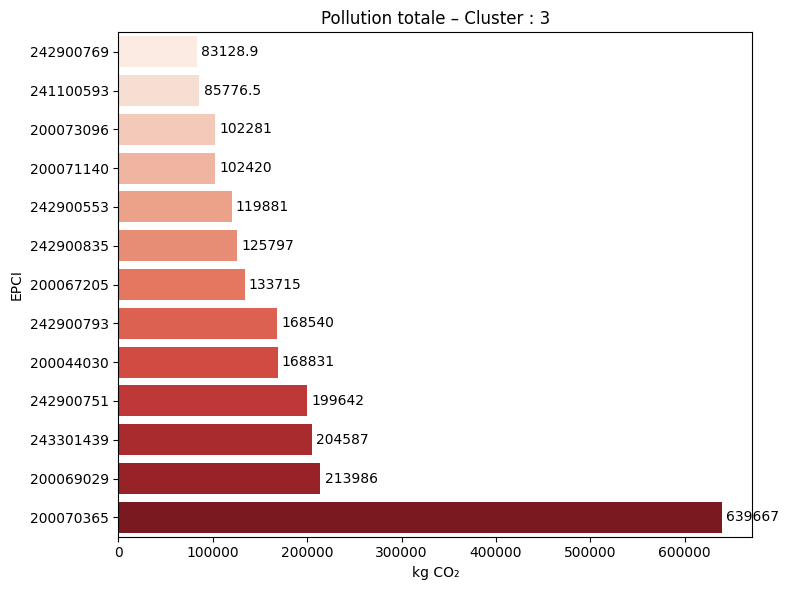

None


/tmp/ipykernel_31087/2274246121.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


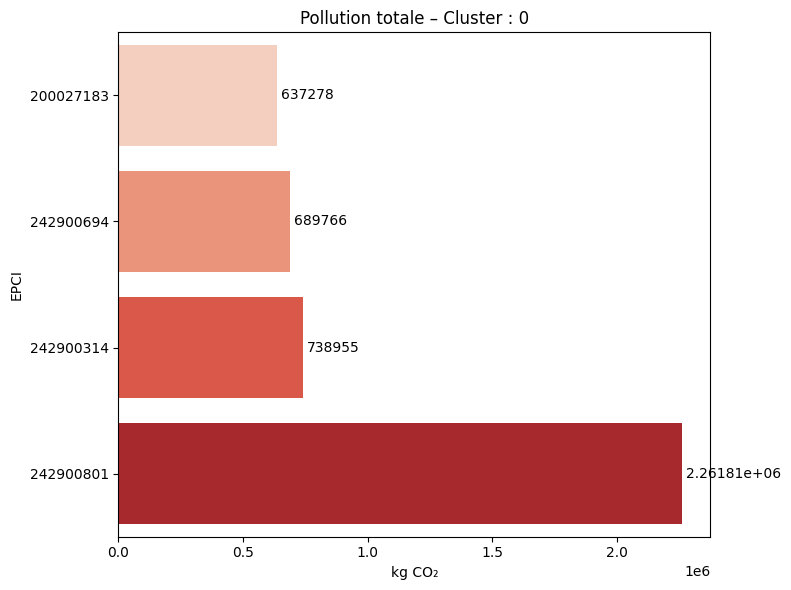

None


/tmp/ipykernel_31087/2274246121.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


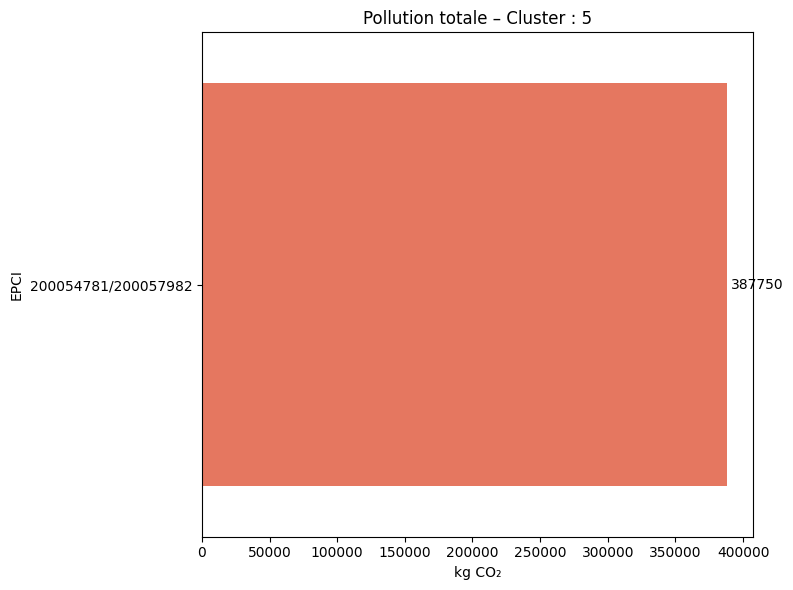

None


/tmp/ipykernel_31087/2274246121.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


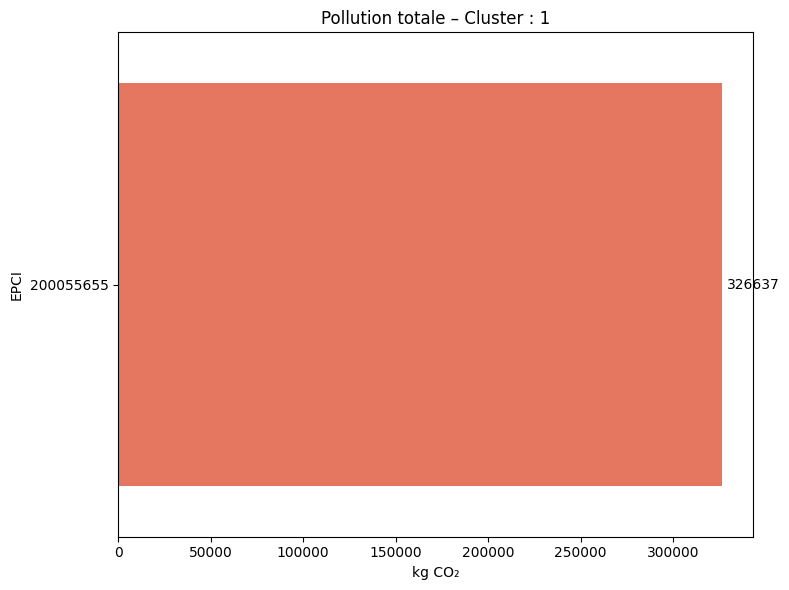

None


In [ ]:
print(plot_pollution_par_cluster(mauvais_eleves_par_cluster, cluster_id=3))
print(plot_pollution_par_cluster(mauvais_eleves_par_cluster, cluster_id=0))
print(plot_pollution_par_cluster(mauvais_eleves_par_cluster, cluster_id=5))
print(plot_pollution_par_cluster(mauvais_eleves_par_cluster, cluster_id=1))